# Rapport de l'ensemble des TP ML
## Réalisé par Kamal LAHOUIR

## Linear Regression

On a first place we import all the libraries we need in Linear Regression

In [66]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This is the part where we define a class of our model  
The class contains the fit function and other functions to predict and plot the loss function

In [67]:
# We define then the class of linearRegression to simplify things
class linearRegression:

    def __init__(self, lr = 0.001, n_iters = 10000):
        self.lr = lr
        self.n_iters = n_iters
        self.Theta = None #Theta includes weights and the bias
        self.loss = []

    def fit(self, X, y):
        n_samples , n_features = X.shape
        X_ = np.hstack((X,np.ones((len(X),1))))
        self.Theta = np.zeros(n_features+1)
        for _ in range(self.n_iters):
            D = (np.dot(X_, self.Theta)- y)
            # Computation of the loss
            J = (1/2*n_samples)*np.sum(D**2)
            self.loss.append([_,J])
            # Computation of the gradient
            dw = (1/n_samples)*np.dot(X_.T, D)
            # Update of theta
            self.Theta -= (self.lr * dw)
        return self.Theta

    def predict(self, X):
        X_ = np.hstack((X,np.ones((len(X),1))))
        return np.dot(X_, self.Theta)

    def accuracy(self,X,y):
        X_ = np.hstack((X,np.ones((len(X),1))))
        u = np.sum((np.dot(X_,self.Theta)-y)**2) 
        v = np.sum((y.mean()-y)**2)
        return 1-u/v

    def draw_loss(self):
        x = np.array(self.loss)[:,0]
        y = np.array(self.loss)[:,1]
        plt.ylabel("Emperical Error")
        plt.xlabel("Iterations")
        plt.plot(x,y)
        plt.show()

Import of some additional libraries to test

In [68]:
# Import of libraries for sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
# Import of the linear Regression function from the class we created
from linearRegression import linearRegression

**Test Part**  
We import the data then we plot it. After that, we get into our division of data and training our model.  
Principally here we will test with a data that is generated through the library Sklearn library. Firstly we plot our data to see it's general form then we apply a split into training and testing data and finally we apply our model


Visualisation of the data : 



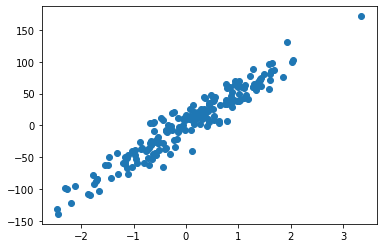

(160, 1)
(2,)
Accuracy:  0.915824350412058 


Visualisation of the loss function:



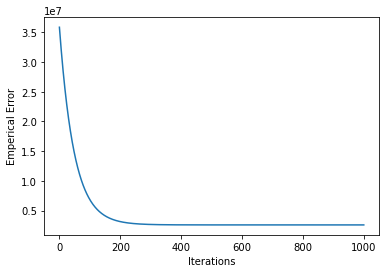

Visualisation of the separator: 



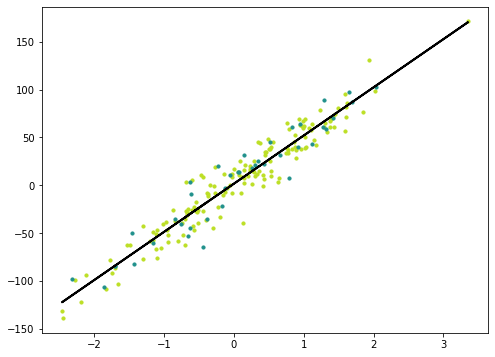

In [69]:
# create a non linear data
X,y = datasets.make_regression(n_samples=200,n_features=1,noise=15)
"""
df = pd.read_csv("data/cars.csv")
df_ = pd.DataFrame(df)
column_maxes = df_.max()
df_max = column_maxes.max()
normalized_df = df_ / df_max

X = np.array(normalized_df['speed'])
X = X.reshape((X.shape[0],1))
print(X.shape)
y = np.array(normalized_df['dist'])
print(y.shape)
"""
# visulize it (close the first window of the visualization so start training the model)
print("Visualisation of the data : \n")
plt.scatter(X,y)
plt.show()


# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X,y , test_size=0.2,shuffle=True)

# initiate the model
model = linearRegression()

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(X_test,Y_test),"\n\n")

# plot the emperical error
print("Visualisation of the loss function:\n")
model.draw_loss()

# plot of linear separator
print("Visualisation of the separator: \n")
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, Y_train , color = cmap(0.9), s = 10)
m2 = plt.scatter(X_test, Y_test , color = cmap(0.5), s = 10)
plt.plot(X , y_pred_line, color = 'black', linewidth = 2 , label = "Prediction")
plt.show()

## Logistic Regression

We begin first by importing the main libraries we need

In [70]:
# Import of libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Then we define our class to maintain clarity of the code and application  

In [71]:
class logisticRegression:

    def __init__(self, lr = 0.001, n_iters = 10000):
        self.lr = lr
        self.n_iters = n_iters
        self.Theta = None #Theta includes weights and the bias
        self.loss = []

    def fit(self, X, y):
        n_samples , n_features = X.shape
        X_ = np.hstack((X,np.ones((len(X),1))))
        self.Theta = np.zeros(n_features+1)
        for _ in range(self.n_iters):
            #Computation 
            linear_model = np.dot(X_, self.Theta)
            y_predicted = self._sigmoid(linear_model)
            D = (y_predicted - y)
            # Computation of the loss
            np.seterr(divide = 'ignore') 
            J = -(1/n_samples)*(np.dot(y.T, np.log(y_predicted)+np.dot((1-y).T, np.log(1-y_predicted))))            
            self.loss.append([_,J])
            # Computation of the gradient
            dw = (1/n_samples)*np.dot(X_.T, D)
            # Update of theta
            self.Theta -= (self.lr * dw)
        return self.Theta

    def predict(self, X):
        X_ = np.hstack((X,np.ones((len(X),1))))
        linear_model = np.dot(X_, self.Theta)
        y_predicted = self._sigmoid(linear_model)
        y_predicted_clear = [ 1 if x > 0.5 else 0 for x in y_predicted]
        return y_predicted_clear

    def accuracy(self,y_true,y_predict):
        accuracy = np.sum(y_true == y_predict) / len(y_true)
        return accuracy

    def _sigmoid(self, X):
        return 1/(1+np.exp(-X))

    def draw_loss(self):
        x = np.array(self.loss)[:,0]
        y = np.array(self.loss)[:,1]
        plt.ylabel("Emperical Error")
        plt.xlabel("Iterations")
        plt.plot(x,y)
        plt.show()

In order to go through the test of our model we need to import some additional librairies

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from linearRegression import linearRegression

Visualisation of data:



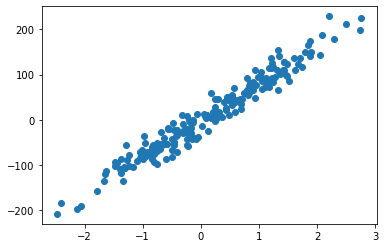

(160, 1)
(2,)
Accuracy:  0.9634892286164282
Visualisation of the loss function:



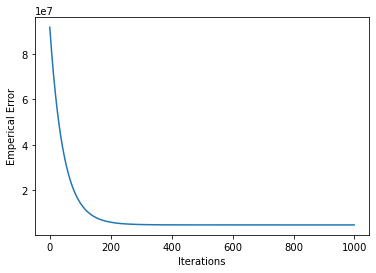

Visualisation of the separator: 



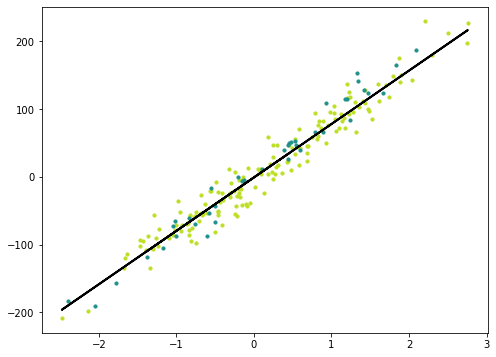

In [73]:


# create a non linear data
X,y = datasets.make_regression(n_samples=200,n_features=1,noise=20)
"""
df = pd.read_excel("data/pop.xlsx")
df_ = pd.DataFrame(df)
column_maxes = df_.max()
df_max = column_maxes.max()
normalized_df = df_ / df_max
X = np.array(normalized_df.iloc[:,:-1])
y = np.array(normalized_df.iloc[:,-1])
"""

# visulize it (close the first window of the visualization so start training the model)
print("Visualisation of data:\n")
plt.scatter(X,y)
plt.show()


# split the data to train and test set
X_train, X_test, Y_train ,Y_test = train_test_split(X,y , test_size=0.2,shuffle=True)

# initiate the model
model = linearRegression()

# train the model
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)

# calculate the accuracy
print("Accuracy: ",model.accuracy(X_test,Y_test))

# plot the emperical error
print("Visualisation of the loss function:\n")
model.draw_loss()

# plot of linear separator
print("Visualisation of the separator: \n")
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, Y_train , color = cmap(0.9), s = 10)
m2 = plt.scatter(X_test, Y_test , color = cmap(0.5), s = 10)
plt.plot(X , y_pred_line, color = 'black', linewidth = 2 , label = "Prediction")
plt.show()
